# Portfolio Optimization

In general, portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.
### Modern Portfolio Theory
**Modern Portfolio Theory**, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level. Or in other terms, minmize risk for a given return level.

It was introduced in a 1952 doctoral thesis by Harry Markowitz. It assumes that an investor wants to maximize a portfolio's expected return contingent on any given amount of risk. For portfolios that meet this criterion, known as efficient portfolios, achieving a higher expected return requires taking on more risk, so investors are faced with a trade-off between risk and expected return.

---


In portfolio theory, the riskiness of an asset is often measured by the ***variance*** (or standard deviation) of its returns. Variance is an important indicator of how volatile this investment will be (how returns can fluctuate). Risk-averse investors do not want their wealth to fluctuate wildly.


a great source for understanding terminology, and calculations:
[Modern Portfolio Theory](https://www.quantconnect.com/tutorials/introduction-to-financial-python/modern-portfolio-theory)


We now try to find a portfolio w=(w1,...,wn) that minimizes risk and maximizes return for a particular set of assets.

In [34]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas_datareader import data as web
from datetime import datetime
import scipy.optimize as opt

In [36]:
plt.style.use('ggplot')

fetching historical price data for list of Stock symbols:

In [37]:
import yfinance as yf
from datetime import datetime, timedelta

# Define parameters
symbols = ['AAPL', 'MSFT', 'GOOGL']  
start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()

# Fetch data
data = yf.download(symbols, 
                   start=start_date,
                   end=end_date,
                   progress=False)

In [38]:
data.head(5)

Price            Close                                High              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2024-01-05  180.296707  135.239731  365.751038  181.869006  136.664573   
2024-01-08  184.655365  138.338516  372.653351  184.695178  138.507900   
2024-01-09  184.237411  140.440887  373.747345  184.247357  140.978945   

Price                          Low                                Open  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2024-01-05  370.037607  179.291637  134.661824  364.507832  181.102771   
2024-01-08  373.160588  180.615161  135.767833  367.004232  181.202281   
2024-01-09  373.946240  181.839157  137.650998  369.172343  183.023358   

Price                                 Volume                      
Ticker           GOOGL        MSFT      AAPL     GOOGL      MSFT  
Date                                                              
2024-01-05  136.256051  366.964407  62303300  22506000  20987000  
2024-01-08  135.797724  367.292634  59144500  21404000  23134000  
2024-01-09  137.999740  369.987893  42841800  24759600  20830000

In [39]:
adj_close = data['Close']
volume = data['Volume']

# Portfolio Analysis Formulas

## 1. Portfolio Return
The **portfolio return** is the weighted average of the returns of the assets in the portfolio.

$$E(R_p) = \sum_{i=1}^n w_i E(R_i)$$

Where:
- $R_p$ = Portfolio return
- $w_i$ = Weight of asset $i$ in the portfolio
- $R_i$ = Return of asset $i$
- $n$ = Number of assets in the portfolio

## 2. Portfolio Variance
The **portfolio variance** measures the risk or volatility of the portfolio. It accounts for the variances and covariances of the individual assets.

$$\text{Var}(R_p) = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$$

Where:
- $\mathbf{w}$ = Vector of portfolio weights
- $\mathbf{\Sigma}$ = Covariance matrix of the asset returns
- $\mathbf{w}^T$ = Transpose of the portfolio weight vector

## 3. Portfolio Standard Deviation (Volatility)
The **portfolio standard deviation** (or **volatility**) is the square root of the portfolio variance.

$$\sigma_p = \sqrt{\text{Var}(R_p)} = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}$$

Where:
- $\sigma_p$ = Portfolio standard deviation (volatility)

## 4. Covariance Matrix
The **covariance matrix** of asset returns measures how the returns of two assets move together.

$$\mathbf{\Sigma} = \begin{pmatrix}
\text{Cov}(R_1, R_1) & \text{Cov}(R_1, R_2) & \cdots & \text{Cov}(R_1, R_n) \\
\text{Cov}(R_2, R_1) & \text{Cov}(R_2, R_2) & \cdots & \text{Cov}(R_2, R_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(R_n, R_1) & \text{Cov}(R_n, R_2) & \cdots & \text{Cov}(R_n, R_n)
\end{pmatrix}$$

Where:
- $\text{Cov}(R_i, R_j)$ = Covariance between returns of assets $i$ and $j$

## 5. Sharpe Ratio
The **Sharpe ratio** measures the risk-adjusted return of the portfolio. It is the ratio of the excess return of the portfolio over the risk-free rate to its standard deviation.

$$S_p = \frac{R_p - R_f}{\sigma_p}$$

Where:
- $S_p$ = Sharpe ratio
- $R_p$ = Portfolio return
- $R_f$ = Risk-free rate
- $\sigma_p$ = Portfolio standard deviation

## 6. Maximum Drawdown
**Maximum drawdown** measures the largest drop from a peak to a trough in the portfolio's value over time.

$$\text{MDD} = \frac{V_{\text{peak}} - V_{\text{trough}}}{V_{\text{peak}}}$$

Where:
- $V_{\text{peak}}$ = Peak portfolio value
- $V_{\text{trough}}$ = Trough portfolio value

## 7. Portfolio Beta
The **portfolio beta** measures the sensitivity of the portfolio's returns to the returns of a benchmark (such as a market index).

$$\beta_p = \mathbf{w}^T \boldsymbol{\beta}$$

Where:
- $\beta_p$ = Portfolio beta
- $\mathbf{w}$ = Portfolio weights
- $\boldsymbol{\beta}$ = Vector of individual asset betas relative to the benchmark

## 8. Portfolio Value (Growth Over Time)
The **portfolio value** over time is the initial value of the portfolio multiplied by the cumulative return.

$$V_{\text{final}} = V_0 \times (1 + R_p)$$

Where:
- $V_{\text{final}}$ = Final portfolio value
- $V_0$ = Initial portfolio value
- $R_p$ = Portfolio return

## 9. Simulated Portfolio Performance (Monte Carlo Simulation)
In Monte Carlo simulations, the portfolio's performance is simulated by randomly generating asset returns and calculating the resulting portfolio's return, risk, and Sharpe ratio.

$$R_{\text{simulated}} = \sum_{i=1}^n w_i R_i^{\text{simulated}}$$
$$\sigma_{\text{simulated}} = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}$$
$$S_{\text{simulated}} = \frac{R_{\text{simulated}} - R_f}{\sigma_{\text{simulated}}}$$

Where:
- $R_{\text{simulated}}$ = Simulated portfolio return
- $\sigma_{\text{simulated}}$ = Simulated portfolio volatility
- $S_{\text{simulated}}$ = Simulated Sharpe ratio

## Summary of Key Formulas

| Metric | Formula |
|--------|---------|
| Portfolio Return | $R_p = \sum_{i=1}^n w_i R_i$ |
| Portfolio Variance | $\text{Var}(R_p) = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$ |
| Portfolio Standard Deviation | $\sigma_p = \sqrt{\text{Var}(R_p)}$ |
| Sharpe Ratio | $S_p = \frac{R_p - R_f}{\sigma_p}$ |
| Maximum Drawdown | $\text{MDD} = \frac{V_{\text{peak}} - V_{\text{trough}}}{V_{\text{peak}}}$ |
| Portfolio Beta | $\beta_p = \mathbf{w}^T \boldsymbol{\beta}$ |

These formulas provide the foundation for most of the calculations that you will need when performing portfolio analysis and optimization.

In [40]:
# defining utility functions

def calc_returns(price_data, resample=None, ret_type="arithmatic"):

    if ret_type=="arithmatic":
        ret = price_data.pct_change().dropna()
    elif ret_type=="log":
        ret = np.log(price_data/price_data.shift()).dropna()
    else:
        raise ValueError("ret_type: return calculation type is not valid. use \"arithmatic\" or \"log\"")

    if resample != None:
        if ret_type=="arithmatic":
            ret = ret.resample(resample).apply(lambda df: (df+1).cumprod(axis=0).iloc[-1]) - 1
        elif ret_type=="log":
            ret = ret.resample(resample).apply(lambda df: df.sum(axis=0))
    return(ret)
        

def calc_returns_stats(returns):
    """
    Parameters
        returns: returns timeseries pd.DataFrame object

    Returns:
        mean_returns: Avereage of returns
        cov_matrix: returns Covariance matrix
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return(mean_returns, cov_matrix)

def portfolio(weights, mean_returns, cov_matrix):

    portfolio_return = np.dot(weights.reshape(1,-1), mean_returns.values.reshape(-1,1))
    portfolio_var = np.dot(np.dot(weights.reshape(1,-1), cov_matrix.values), weights.reshape(-1,1))
    portfolio_std = np.sqrt(portfolio_var)

    return(np.squeeze(portfolio_return),np.squeeze(portfolio_var),np.squeeze(portfolio_std))

In [41]:
monthly_ret_arith = calc_returns(adj_close, resample='BM', ret_type="arithmatic")
monthly_ret_arith.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-31,0.017772,0.032196,0.081115
2024-02-29,-0.018543,-0.011706,0.042318
2024-03-29,-0.051286,0.090062,0.017116
2024-04-30,-0.006706,0.078513,-0.074610
2024-05-31,0.130222,0.059712,0.068191


In [42]:
monthly_ret_log = calc_returns(adj_close, resample='BM', ret_type="log")
monthly_ret_log.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-31,0.017616,0.031689,0.077993
2024-02-29,-0.018717,-0.011775,0.041447
2024-03-29,-0.052648,0.086235,0.016971
2024-04-30,-0.006729,0.075583,-0.077540
2024-05-31,0.122414,0.057998,0.065967


## calculating the returns of an eqaully-weighted portfolio

In [43]:
equal_weights = np.array([1/len(symbols) for _ in range(len(symbols))])

mean_returns, cov_matrix = calc_returns_stats(monthly_ret_arith)
portfolio_return, portfolio_var, portfolio_std = portfolio(equal_weights, mean_returns, cov_matrix)


In [44]:
print("monthly portfolio return:\t%", round(100*portfolio_return.item(),2))
print("\nmonthly portfolio variance:\t%",round(100*portfolio_var.item(),2))
print("\nmean monthly returns of individual assets:\n",mean_returns)
print("\ncovariance matrix of assets returns:\n",cov_matrix)

monthly portfolio return:	% 2.19

monthly portfolio variance:	% 0.12

mean monthly returns of individual assets:
 Ticker
AAPL     0.024576
GOOGL    0.028505
MSFT     0.012573
dtype: float64

covariance matrix of assets returns:
 Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    0.002777  0.000007  0.001083
GOOGL   0.000007  0.002817  0.000257
MSFT    0.001083  0.000257  0.002725


# Monte Carlo Simuation
## Long-only fully invested porfolios

In [45]:
num_iter = 500000

porfolio_var_list = []
porfolio_ret_list = []
w_list =[]

max_sharpe = 0
max_sharpe_var = None
max_sharpe_ret = None
max_sharpe_w = None

daily_ret = calc_returns(adj_close, resample=None, ret_type="log")
mean_returns, cov_matrix = calc_returns_stats(daily_ret)

for i in range(1,num_iter+1):
    rand_weights = np.random.random(len(symbols))
    rand_weights = rand_weights/np.sum(rand_weights)

    porfolio_ret, porfolio_var, portfolio_std = portfolio(rand_weights, mean_returns, cov_matrix)

    # Anuualizing
    porfolio_ret = porfolio_ret * 252
    porfolio_var = porfolio_var * 252
    portfolio_std = portfolio_std * (252**0.5)

    sharpe = (porfolio_ret/(porfolio_var**0.5)).item()
    if sharpe > max_sharpe:
        max_sharpe = sharpe
        max_sharpe_var = porfolio_var.item()
        max_sharpe_ret = porfolio_ret.item()
        max_sharpe_w = rand_weights

    porfolio_var_list.append(porfolio_var)
    porfolio_ret_list.append(porfolio_ret)
    w_list.append(rand_weights)
    if ((i/num_iter)*100)%10 == 0:
        print(f'%{round((i/num_iter)*100)}...',end='')

%10...%20...%30...%40...%50...%60...%70...%80...%90...%100...

In [46]:
stat = np.hstack([np.array(porfolio_ret_list).reshape(-1,1),
                 np.array(porfolio_var_list).reshape(-1,1),
                 (np.array(porfolio_ret_list)/np.sqrt(np.array(porfolio_var_list))).reshape(-1,1)]
                 )
stat=pd.DataFrame(stat, columns=['Return','Variance','Sharpe ratio'])
stat.head(3)

,Return,Variance,Sharpe ratio
0,0.268136,0.038755,1.362039
1,0.303735,0.039966,1.519328
2,0.287497,0.036760,1.499492


In [47]:
# minimum risk porfolio

min_vol = stat[stat['Variance'] == stat['Variance'].min()]
min_vol_index = min_vol.index.item()
min_vol_weights = w_list[min_vol_index]
print("Portfolio with minimum volatility:\n")
print(f"Annual Sharpe Ratio: {round(stat['Sharpe ratio'][min_vol_index],2)} | Annual Return: % {round(stat['Return'][min_vol_index]*100,2)} | Annual Volatility: % {round(stat['Variance'][min_vol_index]*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(min_vol_weights[index]*100,2)}')

Portfolio with minimum volatility:

Annual Sharpe Ratio: 1.24 | Annual Return: % 22.31 | Annual Volatility: % 3.26

AAPL:	% 38.16
MSFT:	% 8.1
GOOGL:	% 53.74


In [48]:
# maximum sharpe ratio porfolio

print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(max_sharpe,2)} | Annual Return: % {round(max_sharpe_ret*100,2)} | Annual Volatility: % {round(max_sharpe_var*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(max_sharpe_w[index]*100,2)}')

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 1.58 | Annual Return: % 32.26 | Annual Volatility: % 4.17

AAPL:	% 59.35
MSFT:	% 40.64
GOOGL:	% 0.01


C:\Users\raush\AppData\Local\Temp\ipykernel_18984\2472231154.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);


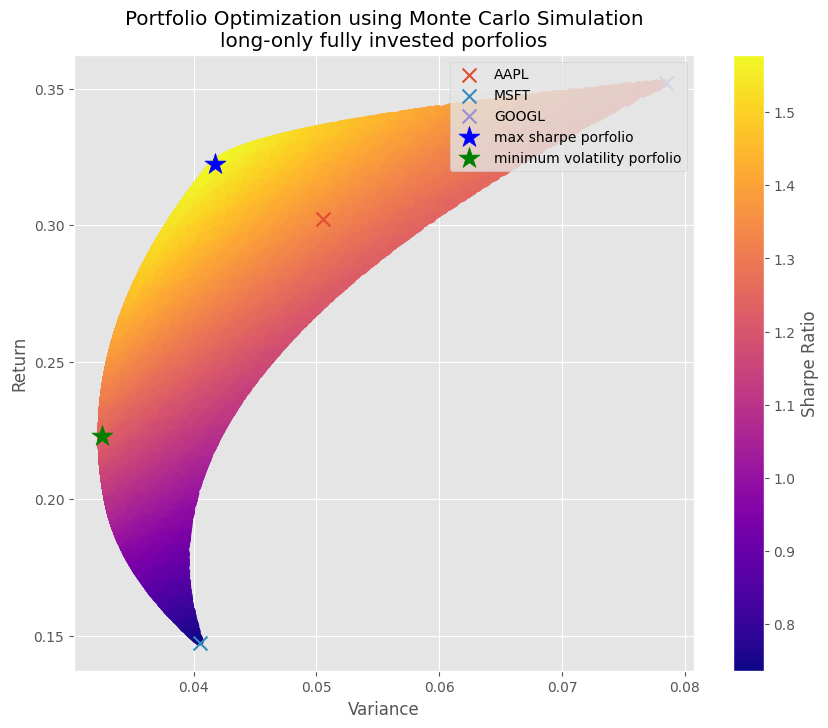

In [49]:
#plotting the portfolios

daily_ret_var = daily_ret.var()
plt.figure(figsize=(10,8))
plt.scatter(porfolio_var_list,porfolio_ret_list,c=stat['Sharpe ratio'], alpha=0.8, cmap='plasma')
for sym in symbols:
    plt.scatter(daily_ret_var.loc[sym]*252, mean_returns.loc[sym]*252, marker='x', s=100, label=sym)

plt.scatter([max_sharpe_var], [max_sharpe_ret], marker='*', s=250, label='max sharpe porfolio', c='blue')
plt.scatter(min_vol['Variance'].values, min_vol['Return'].values, marker='*', s=250, label='minimum volatility porfolio', c='green')

plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Portfolio Optimization using Monte Carlo Simulation\nlong-only fully invested porfolios')
plt.legend(loc='upper right')

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=stat['Sharpe ratio'].min(), vmax=stat['Sharpe ratio'].max())
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);

# Optimization using scipy optimize module (Sequential Least Squares Programming)





In [50]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    sr = ((portfolio_return - risk_free_rate)/portfolio_std) * (252**0.5) # annualized
    return(-sr)

def portfolio_variance(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    return(portfolio_var*252)

In [51]:
daily_ret = calc_returns(adj_close, resample=None, ret_type="log")
mean_returns, cov_matrix = calc_returns_stats(daily_ret)

In [52]:
def optimize_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0, w_bounds=(0,1)):
    "This function finds the portfolio weights which minimize the negative sharpe ratio"

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    result = opt.minimize(fun=neg_sharpe_ratio,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    
    if result['success']:
        print(result['message'])
        opt_sharpe = - result['fun']
        opt_weights = result['x']
        opt_return, opt_variance, opt_std = portfolio(opt_weights, mean_returns, cov_matrix)
        return(opt_sharpe, opt_weights, opt_return.item()*252, opt_variance.item()*252, opt_std.item()*(252**0.5))
    else:
        print("Optimization operation was not succesfull!")
        print(result['message'])
        return(None)
    

In [53]:
opt_sharpe, opt_weights, opt_return, opt_variance, opt_std = optimize_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0, w_bounds=(0,1))

Optimization terminated successfully


In [54]:
# maximum sharpe ratio porfolio
print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(opt_sharpe,2)} | Annual Return: % {round(opt_return*100,2)} | Annual Volatility: % {round(opt_variance*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(opt_weights[index]*100,2)}')

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 1.58 | Annual Return: % 32.28 | Annual Volatility: % 4.18

AAPL:	% 58.99
MSFT:	% 41.01
GOOGL:	% 0.0


In [55]:
def minimize_portfolio_variance(mean_returns, cov_matrix, w_bounds=(0,1)):
    "This function finds the portfolio weights which minimize the portfolio volatility(variance)"

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    result = opt.minimize(fun=portfolio_variance,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    
    if result['success']:
        print(result['message'])
        min_var = result['fun']
        min_var_weights = result['x']
        min_var_return, min_var_variance, min_var_std = portfolio(min_var_weights, mean_returns, cov_matrix)
        min_var_sharpe = (min_var_return/min_var_std)*(252**0.5)
        return(min_var_sharpe, min_var_weights, min_var_return.item()*252, min_var_variance.item()*252, min_var_std.item()*(252**0.5))
    else:
        print("Optimization operation was not succesfull!")
        print(result['message'])
        return(None)

In [56]:
min_var_sharpe, min_var_weights, min_var_return, min_var_variance, min_var_std = minimize_portfolio_variance(mean_returns, cov_matrix, w_bounds=(0,1))

Optimization terminated successfully


In [57]:
# minimum volatility porfolio
print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(min_var_sharpe,3)} | Annual Return: % {round(min_var_return*100,2)} | Annual Volatility: % {round(min_var_variance*100,3)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(min_var_weights[index]*100,2)}')

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 1.236 | Annual Return: % 22.3 | Annual Volatility: % 3.255

AAPL:	% 38.1
MSFT:	% 8.11
GOOGL:	% 53.79


# Minimum Variance Portfolio (MVP)

## Overview
The **Minimum Variance Portfolio** (MVP) refers to the portfolio that achieves the lowest possible risk (variance or standard deviation) for a given set of assets. It minimizes the portfolio's volatility while considering the correlation and variance between the assets.

For a **target return**, you can calculate the optimal weights for the Minimum Variance Portfolio that provides that target return by solving a constrained optimization problem.

## Mathematical Formulation

### 1. Portfolio Variance
The variance of the portfolio is given by:

$$\text{Var}(R_p) = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$$

Where:
- $\mathbf{w}$ = Vector of portfolio weights
- $\mathbf{\Sigma}$ = Covariance matrix of asset returns

### 2. Expected Portfolio Return
The expected return of the portfolio is:

$$R_p = \mathbf{w}^T \mathbf{R}$$

Where:
- $R_p$ = Portfolio return
- $\mathbf{w}$ = Vector of portfolio weights
- $\mathbf{R}$ = Vector of asset expected returns

### 3. Optimization Problem
To minimize the variance for a given target return, solve:

$$\min_{\mathbf{w}} \quad \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$$

Subject to the constraints:

$$\mathbf{w}^T \mathbf{R} = R_p^{\text{target}}$$
$$\sum_{i=1}^n w_i = 1$$

Where:
- $\mathbf{w}$ = Vector of portfolio weights
- $\mathbf{\Sigma}$ = Covariance matrix of asset returns
- $\mathbf{R}$ = Vector of expected returns of the assets
- $R_p^{\text{target}}$ = Target portfolio return

## Solution Using Lagrange Multiplier

### Lagrangian Function
The optimization problem can be solved using Lagrange multipliers. The Lagrangian function is:

$$\mathcal{L}(\mathbf{w}, \lambda) = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w} - \lambda (\mathbf{w}^T \mathbf{R} - R_p^{\text{target}}) - \gamma (\sum_{i=1}^n w_i - 1)$$

Where:
- $\lambda$ and $\gamma$ are Lagrange multipliers

### Solution for Portfolio Weights
After differentiating and setting the gradient to zero, the optimal weights are:

$$\mathbf{w} = \frac{\mathbf{\Sigma}^{-1} (\mathbf{R} - \lambda \mathbf{1})}{\mathbf{1}^T \mathbf{\Sigma}^{-1} (\mathbf{R} - \lambda \mathbf{1})}$$

Where:
- $\mathbf{w}$ = Vector of optimal portfolio weights
- $\mathbf{\Sigma}^{-1}$ = Inverse of the covariance matrix
- $\mathbf{R}$ = Vector of expected returns
- $\mathbf{1}$ = Vector of ones (used for the sum constraint)

The value of $\lambda$ is determined by using the target return constraint:

$$\mathbf{w}^T \mathbf{R} = R_p^{\text{target}}$$

## Intuition
The solution provides:
1. Portfolio weights that minimize risk while achieving a desired level of return
2. The least risk (variance) among all possible portfolios that provide the specified target return
3. A balance between risk minimization and return targeting through the Lagrange multiplier approach

## Implementation Notes
1. The covariance matrix must be positive definite
2. The solution assumes no short-selling (all weights ≥ 0)
3. The target return must be feasible given the available assets

In [58]:
def calc_portfolio_return(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    return(portfolio_return.item()*252)

def efficient_portfolio(mean_returns, cov_matrix, target_return, w_bounds=(0,1)):
    """retuens the portfolio weights with minimum variance for a specific level of expected portfolio return"""    

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1},
                   {'type': 'eq', 'fun': lambda x: 252*np.squeeze(np.dot(x.reshape(1,-1),mean_returns.values.reshape(-1,1))) - target_return})
    result = opt.minimize(fun=portfolio_variance,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    if not result['success']:
        print(result['message'])
    efficient_variance = result['fun']
    efficient_weights = result['x']
    efficient_return, _ , efficient_std = portfolio(efficient_weights, mean_returns, cov_matrix)
    efficient_sahrpe = (efficient_return/efficient_return)*(252**0.5)
    return(efficient_sahrpe, efficient_weights, efficient_return.item()*252, efficient_variance, efficient_std.item()*(252**0.5))

In [59]:
expected_return = 0.3
efficient_sharpe, efficient_weights, efficient_return, efficient_variance, efficient_std = efficient_portfolio(mean_returns,
                                                                                                                cov_matrix,
                                                                                                                target_return=expected_return,
                                                                                                                w_bounds=(0,1))

In [60]:
# efficient porfolio
print("Efficient portfolio for 30% return level:\n")
print(f"Annual Sharpe Ratio: {round(efficient_sharpe ,3)} | Annual Return: % {round(efficient_return*100,2)} | Annual Volatility: % {round(efficient_variance*100,3)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(efficient_weights[index]*100,2)}')

Efficient portfolio for 30% return level:

Annual Sharpe Ratio: 15.875 | Annual Return: % 30.0 | Annual Volatility: % 3.803

AAPL:	% 56.21
MSFT:	% 32.0
GOOGL:	% 11.8


## Efficient Frontier

C:\Users\raush\AppData\Local\Temp\ipykernel_18984\3819858850.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);


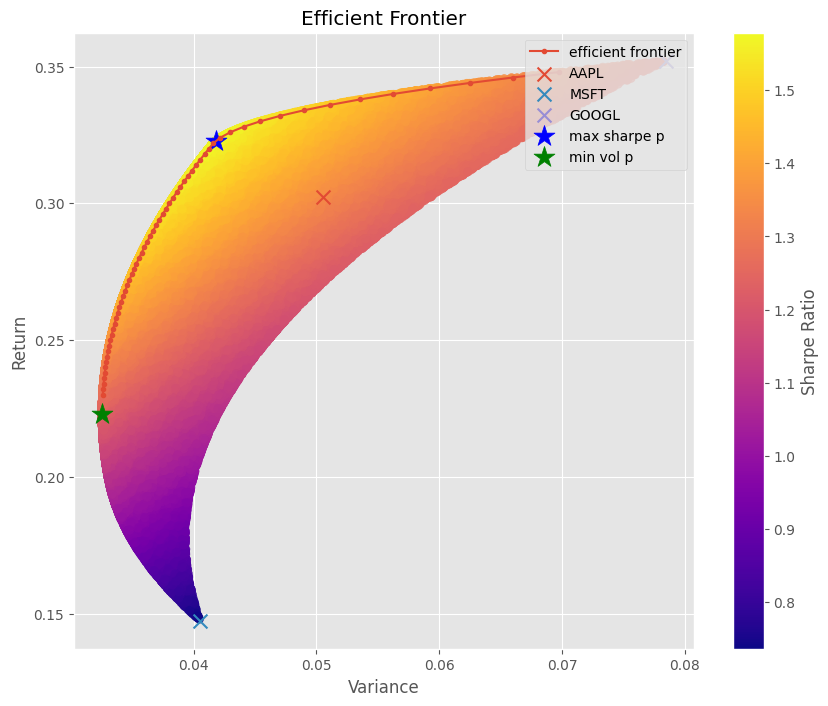

In [61]:

#plotting the Efficient Frontier

daily_ret_var = daily_ret.var()
plt.figure(figsize=(10,8))

target_rets = np.arange(0.23,0.35,0.002)
efficient_vars = np.array([efficient_portfolio(mean_returns,cov_matrix,target_return=x ,w_bounds=(0,1))[3] for x in target_rets])
plt.plot(efficient_vars,target_rets,marker='.',label="efficient frontier")

plt.scatter(porfolio_var_list,porfolio_ret_list,c=stat['Sharpe ratio'], alpha=0.8, cmap='plasma')
for sym in symbols:
    plt.scatter(daily_ret_var.loc[sym]*252, mean_returns.loc[sym]*252, marker='x', s=100, label=sym)

plt.scatter([opt_variance], [opt_return], marker='*', s=250, label='max sharpe p', c='blue')
plt.scatter(min_var_variance, min_var_return, marker='*', s=250, label='min vol p', c='green')

plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend(loc='upper right')

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=stat['Sharpe ratio'].min(), vmax=stat['Sharpe ratio'].max())
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);